In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import gin
import ddsp
from ddsp import spectral_ops, core
from IPython.display import Audio
import ipywidgets as widgets
import soundfile
import sys

import warnings
warnings.filterwarnings("ignore")

from utils import specplot, QuantileTransformer, fit_quantile_transform
DQuantileTransformer = QuantileTransformer
from composition.common import (
    sinusoid, sweeping_sinusoid, line_segment, constant, triangle, square,
    to_db_loudness, generate_audio, autotune
)
import random

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


- Violin 55-103
- Viola 48-91
- Cello 36-76
- Flute 60-96
- Flute2 55-91

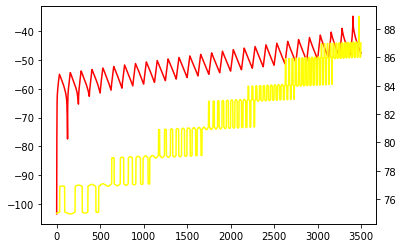

In [39]:
instrument = 'violin'

duration = 14
loudness = triangle(duration, 2, 0.25)
loudness += line_segment(duration, 0, 2)
loudness_db = to_db_loudness(loudness, instrument, db_offset=-8)

pitch = line_segment(duration, 75, 87)
pitch += sweeping_sinusoid(duration, 1, 8, 0.1)
pitch = autotune(pitch, 0.9, 'melodic_minor')

audio = generate_audio(instrument, pitch, loudness_db)

fig,ax = plt.subplots()
ax2=ax.twinx()
ax.plot(loudness_db, color='red')
ax2.plot(pitch, color='yellow')

Audio(audio, rate=16000)